In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def bgr_to_rgb(imgfile):
    b, g, r = cv2.split(imgfile)
    imgfile = cv2.merge([r, g, b])
    return imgfile

# 이미지 더하기

    두개의 이미지를 더하는 데는 2가지 방법이 있다. 하나는 + operator를 사용하여 연산하는 방법과 다른 하나는 opencv의 add함수를 사용하는 것이다. 두 방법 모두 서로 다른 이미지를 더하지만 더하는 방식에는 그 차이가 있다.
    
## img1 + img2
    우리가 opencv의 imread 함수로 이미지를 불러들였을 때, 그 이미지가 numpy array의 형식을 가지고 있으므로 img1과 img2를 더하는 것은 해당 이미지의 numpy array를 더하는 것과 같다. 따라서 img1과 img2를 + operator로 연산하기 위해서는 ★동일한 크기와 동일한 데이터 타입으로 이루어져 있어야 한다. + operator를 사용하였을 때 각 픽셀들을 더한 값이 255보다 크면 그 값을 256으로 나눈 나머지가 픽셀값이 된다. 예를들어 두 이미지 특정 픽셀의 Blue 채널의 합이 257인 경우 해당 픽셀의 Blue 채널은 1의 값을 가지게 된다.
    
## cv2.add(img1, img2)
    add()함수를 사용하는 경우 마찬가지로  numpy array를 그대로 덧셈으로 연산하지만 + operator를 사용하는 것과는 다르게 해당 픽셀값이 255를 넘어가면 그 픽셀값을 255로 고정하여 사용한다.

In [3]:
def addImage(imgfile1, imgfile2):
    img1 = cv2.imread(imgfile1)
    img2 = cv2.imread(imgfile2)
    
    cv2.imshow('img1', img1)
    cv2.imshow('img2', img2)
    
    add_img1 = img1 + img2
    add_img2 = cv2.add(img1, img2)
    
    cv2.imshow('img1+img2', add_img1)
    cv2.imshow('cv2.add(img1, img2)', add_img2)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
addImage('anemone-5281964_1280.jpg', 'dove-2516641_1280.jpg')

-------------------------------
# 이미지 블렌딩 (Blending)
    이미지 블렌딩은 이미지를 서로 합칠 때 가중치를 두어 합치는 방법이다. 두 이미지가 있고 1번 이미지에서 2번 이미지로 전환하려고 하는데, 서서히 변환하려고 할 때 이것이 좋은 기법이 될 수 있다.
    
    아래는 이미지 블렌딩 기법을 구현하기 위한 수식 중 하나이다.
    g(x) = (1-a)f_0(x) + af_1(x)
    
    여기서 a의 값이 0 에서 1로 변해감에 따라 f_0(x)의 효과는 점점 작아지고 f_1(x)의 효과는 점점 커지게 된다. 이미지 블렌딩을 사용하려고 할 때 opencv의 addWeighted() 함수를 사용할 수 있다.

In [5]:
img1 = cv2.imread('anemone-5281964_1280.jpg')
img2 = cv2.imread('dove-2516641_1280.jpg')

In [6]:
def onChange(x):
    pass

In [7]:
def ImgBlending(imgfile1, imgfile2):
    cv2.namedWindow('Img')
    cv2.createTrackbar('Blending', 'Img', 0, 1000, onChange)
    
    while True:
        weight = cv2.getTrackbarPos('Blending', 'Img')
        img = cv2.addWeighted(imgfile1, float(1000-weight) * 0.001, imgfile2, float(weight) * 0.001, 0)
        cv2.imshow('Img', img)
        
        k = cv2.waitKey(0) & 0xFF
        if k == 27:
            break
        
    cv2.destroyAllWindows()

In [8]:
ImgBlending(img1, img2)

    cv2.namedWindow('Img')
    cv2.createTrackbar('Blending', 'Img', 0, 1000, onChange)
    처음부터 코드를 차례대로 살펴보자. 우선 이미지를 열 윈도우 창의 이름을 Img라 정의하고 그 창에서 만들어낼 트랙바 이름을 'Blending'이라 정의해보자. 지난번 트랙바를 정의할 때 TrackbarCallback 함수에서 아무 처리를 하지 않았던 것처럼 이번에도 onChange 함수에선 아무 동작을 하지 않도록 pass로 처리하였다. 시작값은 0, 마지막값은 1000으로 지정한다.
    
    
    weight = cv2.getTrackbarPos('Blending', 'Img')
    이렇게 Img 윈도우 창 위에 Blending 트랙바를 만들었으면 Blending 위치 정보를 가중치라 정의하여 weight로 초기화한다.
    
    그 다음 이 가중치를 사용하여 이미지 블렌딩 기법을 구현한다. addweighted 함수를 사용한다.

## cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) → dst
    dst(I)=saturate(src1(I)∗alpha+src2(I)∗beta+gamma)
    g(x) = (1-a)f_0(x) + af_1(x)

    위 수식에서 f_0(x)와 f_1(x)는 addWeighted 파라미터에서 각각 src1과 src2를 나타낸다. 해당 위치에는 각각 원본이미지 1과 원본이미지 2가 들어갈 수 있다. 또한 수식에서 f_0(x)에 효과를 주는 (1-a)와 f_1(x)에 효과를 주는 a는 파라미터에서 각각 alpha와 beta를 나타낸다. alpha는 src1 파라미터에 영향을 주며, beta는 src2 파라미터에 영향을 준다. (★이때 alpha, beta, gamma는 double 형이어야 한다.)
    
    블렌딩한 결과 g(x)가 온전히 나타내어질 수 있으려면 우선 원본 이미지1, 2가 0~255의 픽셀 값으로 온전히 나타내어져야 한다. 예를들어 a가 0일 경우 f_0(x)의 원본이미지 1이 온전히 나타내어져야 하고, a가 1일 경우 f_1(x)의 원본이미지 2가 온전히 나타내어져야 한다. 그러기 위해선 alpha와 beta값의 크기가 0~1사이가 되어야 한다.
    
    alpha :: trackbarpos의 크기가 0~1000 사이이므로 우선 float(1000-weight)를 통해 f_0(x)의 픽셀값을 역전시켜준 후, 0.001을 곱해서 alpha 값을 0~1사이로 맞춰준다.
    beta :: alpha의 경우와 마찬가지지만 float(weight)만을 수행하여 f_1(x)의 픽셀값을 역전시키지 않은 상태에서 0.001을 곱해 beta 값을 0~1사이로 맞춰준다.
    gamma :: 따로 bias 값은 필요하지 않으므로 설정하지 않는다.
    
    img = cv2.addWeighted(imgfile1, float(1000-weight) * 0.001, imgfile2, float(weight) * 0.001, 0)
    이렇게 addWeighted로 수행된 numpy array 값을 img 변수에 저장한다.

--------
# 이미지 비트연산
    이미지는 AND, NOT, OR, XOR 의 비트연산이 가능하다. 이미지 비트연산은 이미지에서 특정 영역을 추출하거나 직사각형 모양이 아닌 ROI를 정의할 때, 이미지에서 바탕을 제거하고 2개의 이미지를 합칠 때에 유용하게 사용할 수 있다.

In [9]:
def bitOperation_black_bg(hpos, vpos):
    img1 = cv2.imread('iceland-1979445_1280.jpg')
    img2 = cv2.imread('opencv_logo.png')
    
    rows, cols, channels = img2.shape
    roi = img1[ vpos:vpos + rows, hpos:hpos + cols ]
    
    img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    
    img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
    img2_fg = cv2.bitwise_and(img2, img2, mask = mask)
    
    dst = cv2.add(img1_bg, img2_fg)
    img1[ vpos:vpos + rows, hpos:hpos + cols ] = dst
    
    b, g, r = cv2.split(img1)
    img1 = cv2.merge([r, g, b])
    
    plt.imshow(img1)
    plt.title('result')
    plt.xticks([])
    plt.yticks([])
    plt.show()

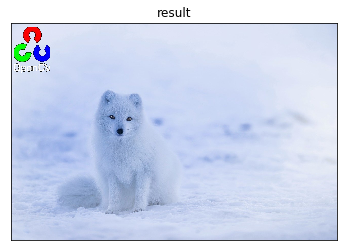

In [10]:
bitOperation_black_bg(10, 20)

In [11]:
def bitOperation_white_bg(hpos, vpos):
    img1 = cv2.imread('iceland-1979445_1280.jpg')
    img2 = cv2.imread('atom-4.png')
    
    rows, cols, channels = img2.shape
    roi = img1[ vpos:vpos + rows, hpos:hpos + cols ]
    
    img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 203, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    
    img1_bg = cv2.bitwise_and(roi, roi, mask = mask)
    img2_fg = cv2.bitwise_and(img2, img2, mask = mask_inv)
    
    dst = cv2.add(img1_bg, img2_fg)
    img1[ vpos:vpos + rows, hpos:hpos + cols ] = dst
    
    b, g, r = cv2.split(img1)
    img1 = cv2.merge([r, g, b])
    
    plt.imshow(img1)
    plt.title('result')
    plt.xticks([])
    plt.yticks([])
    plt.show()

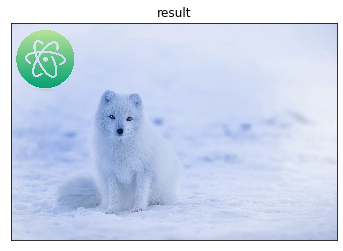

In [12]:
bitOperation_white_bg(10, 20)

    위 두 함수는 로고의 배경이 검은색인지, 흰색인지에 따라서 달라진다. 특별한 차이점은 없으나 black_bg 에서는 img1_bg 변수를 초기화 할 때 mask = mask_inv로 지정해준 반면 white_bg 에서는 img2_bg 변수를 초기화 할 때 mask = mask로 지정해준 것이 차이점이다.
    
    black_bg 함수부터 차근차근 살펴보자

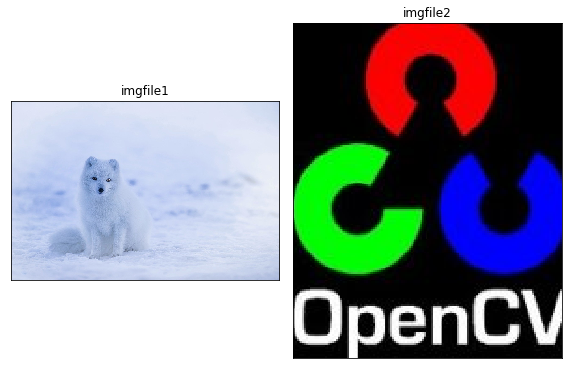

In [13]:
img1 = cv2.imread('iceland-1979445_1280.jpg')
img2 = cv2.imread('opencv_logo.png')

imgfile1_rgb = bgr_to_rgb(img1)
imgfile2_rgb = bgr_to_rgb(img2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(imgfile1_rgb)
plt.title('imgfile1')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(imgfile2_rgb)
plt.title('imgfile2')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

    우선 배경이 될 이미지를 img1, 그 이미지에 집어넣을 다른 로고 이미지를 img2에 지정한다.

    이후 로고 이미지를 배경 이미지에 넣을 위치를 ROI를 통해 지정해주어야 한다. 우선 img2.shape를 통해 각각의 요소를 rows, cols, channels에 저장한다. 그리고 배경 이미지에 그 크기만큼 roi를 지정해준다. 여기서 hpos와 vpos 인자가 들어가게 되는데 임시로 10으로 지정해주었다.

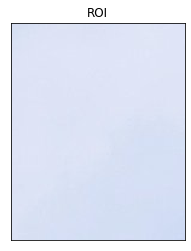

In [14]:
rows, cols, channels = img2.shape
roi = img1[ 10:10 + rows, 10:10 + cols ]

roi_bgr = bgr_to_rgb(roi)
plt.imshow(roi_bgr)
plt.title('ROI')
plt.xticks([])
plt.yticks([])
plt.show()

    먼저 로고 이미지를 흑백으로 변환하고 이를 binary image로 전환한다. 이때 threshold 함수가 사용되는데 이에 대해서는 나중에 자세하게 다룰 예정이다. 간단하게 설명하면, img2gray 이미지에서 픽셀값이 10이상 넘어가는 부분을 255(흰색)으로 바꿔주는 부분이다. 그리고 해당 이미지를 mask에 저장한다. 비트연산 NOT을 이용해 이를 반전시켜 mask_inv에 저장한다. 즉, mask_inv에서는 mask에서 흰색인 부분이 검은색으로 저장된다.

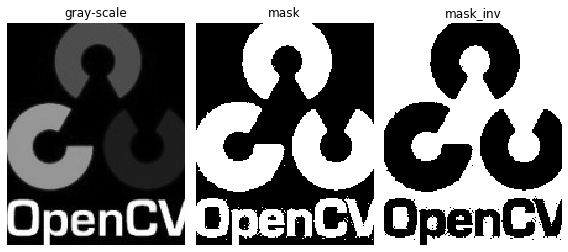

In [15]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

images = [img2gray, mask, mask_inv]
titles = ["gray-scale", "mask", "mask_inv"]

plt.figure(figsize=(8, 8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

    cv2.bitwise_and 연산에서는 AND 연산이 수행된다. 즉 둘 다 0이 아닌 경우에만 값을 통과시킨다는 뜻이다. 이때 mask를 지정해주면 mask가 0이 아닌 부분에서만 AND 연산을 수행한다. mask_inv는 로고부분이 0(검정색)이고, mask는 로고가 아닌 배경부분이 0(검정색)이므로 AND연산을 수행하였을 때 img1_bg는 로고부분만 0(검은색), img2_fg는 배경부분만 0(검은색)으로 나오게 된다. 따라서 이 둘을 add 함수로 연산하였을 때 최종적으로 합쳐지게 된다.

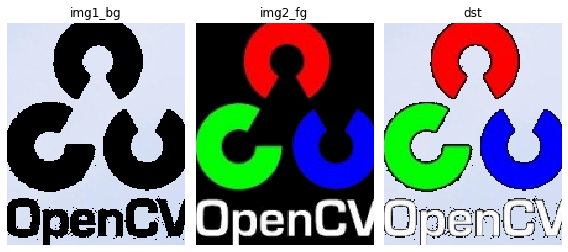

In [16]:
img1_bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
img2_fg = cv2.bitwise_and(img2, img2, mask = mask)
dst = cv2.add(img1_bg, img2_fg)

img1_bg_rgb = bgr_to_rgb(img1_bg)
img2_fg_rgb = bgr_to_rgb(img2_fg)
dst_rgb = bgr_to_rgb(dst)

images = [img1_bg_rgb, img2_fg_rgb, dst_rgb]
titles = ["img1_bg", "img2_fg", "dst"]

plt.figure(figsize=(8, 8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

    dst를 다시 관심영역으로 지정했던 부분에 합쳐주게 되면 최종적으로 배경 이미지에 로고를 합성한 이미지가 나타나게 된다.

In [17]:
img1[ 10:10 + rows, 10:10 + cols ] = dst
cv2.imshow('result', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()